In [25]:
import pickle
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

In [26]:
import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-3])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items
import util.scraper as scraper

/home/makoa/School/osrs_research
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/makoa/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/home/makoa/.local/lib/python3.6/site-packages/IPython/extensions', '/home/makoa/.ipython', '/home/makoa/School/osrs_research', '/home/makoa/School/osrs_research']


In [27]:
with open('price.pickle','rb') as f:
    results = pickle.load(f)

In [28]:
len(results)

2115

In [29]:
itemList = [item for item in results if len(items.getQuants(item))>0 and np.mean(items.getQuants(item)[-7:])>100 and np.median(items.getPrices(item)[-7:])>100]
print(len(itemList))

1064


In [30]:
results['Abyssal_whip'].keys()

dict_keys(['model_opt', 'buyAndHold', 'testPrices', 'momentum_model', 'perfect', 'startLoss', 'sma', 'predictions', 'numPrices', 'sma_model', 'stochOscil', 'momentum', 'numItems', 'item', 'persist', 'numEpochs', 'model', 'endLoss', 'startMAE', 'endMAE', 'opt_params', 'stochOscil_model'])

In [31]:
mae = [results[item]['endMAE'] for item in itemList]
maeChange = [results[item]['startMAE']-results[item]['endMAE'] for item in itemList]

0.1433034446765557 0.11560127247463572 0.11119456566524386


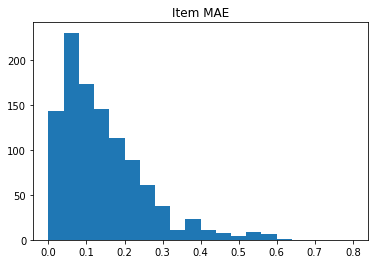

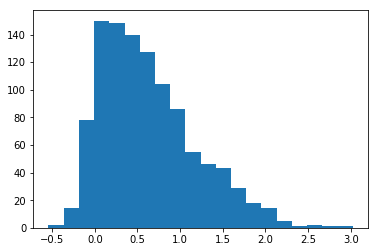

In [36]:
print(np.mean(mae),np.median(mae),np.std(mae))
plt.hist(mae,20,range=(0,.8))
plt.title('Item MAE')
plt.show()
plt.hist(maeChange,20)
plt.show()

In [9]:
maeChange = [(item,results[item]['startMAE']-results[item]['endMAE']) for item in itemList]
maeChange = sorted(maeChange, key=lambda x: x[1], reverse=True)

In [10]:
print(maeChange[:100])

[('Rune_axe', 3.024203011122617), ('Steel_warhammer', 2.7590974504297434), ('Mystic_hat', 2.640528906475414), ('Adamant_longsword', 2.585588990016417), ('Super_restore(1)', 2.38340059410442), ('Black_full_helm_(g)', 2.300574423779141), ('Adamant_med_helm', 2.2804533503272317), ('Adamant_chainbody', 2.2448882444338363), ("Red_d'hide_body", 2.188408615372398), ('Steel_longsword', 2.1423262411897834), ('Splitbark_gauntlets', 2.099276293407787), ('Armadyl_kiteshield', 2.0927550391717387), ('Potato_cactus', 2.0701560418714173), ('Raw_swordfish', 2.0579172427004035), ('Mystic_water_staff', 2.0442646151239225), ('Pie_shell', 2.0425365269184113), ('Adamant_full_helm', 2.028512879393318), ('Ancient_page_3', 2.0186217969114133), ('Arcane_spirit_shield', 2.0096980306235226), ('Toxic_staff_(uncharged)', 1.986421223391186), ('Mithril_brutal', 1.9848863956603136), ('Zamorak_dragonhide_set', 1.9840505266731436), ('Red_dragonhide', 1.9804013046351348), ('Armadyl_page_3', 1.967956493930383), ('Baked_po

In [11]:
print(maeChange[-100:])

[('Raw_lobster', 0.002040721069682734), ('Armadyl_coif', -0.0009880428964441634), ('Emerald_necklace', -0.001211138205094775), ('Prayer_potion(4)', -0.004228357293389058), ('Steel_battleaxe', -0.004735331643711441), ('Big_bones', -0.00585811490362341), ('Lockpick', -0.008230263536626634), ('Team-15_cape', -0.008291881328279321), ('Iron_platelegs', -0.008311054923317629), ('Toktz-xil-ak', -0.009819468313997437), ('Uncut_ruby', -0.012325162237340745), ('Mithril_bar', -0.01492954248731787), ('Infinity_boots', -0.018387103622609917), ('Vodka', -0.018780927766453154), ('Cream_robe_top', -0.01911383894356815), ('Toadflax_seed', -0.020647607523609293), ('Uncut_emerald', -0.020937614142894745), ('Bracelet_of_clay', -0.023987417329441416), ("Mage's_book", -0.02907438305291262), ('Lantadyme_potion_(unf)', -0.03187101808461276), ('Strength_potion(3)', -0.03317844827066768), ("Verac's_brassard", -0.03369302045215259), ('Grimy_tarromin', -0.03801573921333662), ('Cake', -0.038983293554999604), ('Tri

In [12]:
prices = [items.getPrices(item)[-1] for item in itemList]
numEpochs = [results[item]['numEpochs'] for item in itemList]
variance = [np.var(results[item]['testPrices']) for item in itemList]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in itemList]
profs = [results[item]['model'] for item in itemList]
pers = [results[item]['persist'] for item in itemList]
perf = [results[item]['perfect'] for item in itemList]
bah = [results[item]['buyAndHold'] for item in itemList]
mae = [results[item]['endMAE'] for item in itemList]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in itemList]

In [24]:
print('price,mae',np.corrcoef(prices,mae)[0][1])
print('bl,price',np.corrcoef(buylimits,mae)[0][1])
print('mae,numEpochs',np.corrcoef(mae,numEpochs)[0][1])
print('prof,numEpochs',np.corrcoef(profs,numEpochs)[0][1])
print('prof,pers',np.corrcoef(mae,pers)[0][1])
print('mae,perf',np.corrcoef(mae,perf)[0][1])
print('mae,bah',np.corrcoef(mae,bah)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('variance,mae',np.corrcoef(variance,mae)[0][1])

price,mae 0.05364779688480283
bl,price -0.011088838593104623
mae,numEpochs -0.33475814214305993
prof,numEpochs 0.08011192030813026
prof,pers 0.10601348155692095
mae,perf 0.11212347405475412
mae,bah 0.056240493470886124
profdiff,mae 0.10533760892466514
variance,mae 0.0240321230857378


In [37]:
for item in itemList:
    try:
        y_pred = results[item]['predictions']
        y_test = results[item]['testPrices']
        true_pos = len([y_pred[i] for i in range(len(y_pred)-1) if y_pred[i+1] - y_pred[i] > 0 and y_test[i+1] - y_test[i] > 0])
        false_pos = len([y_pred[i] for i in range(len(y_pred)-1) if y_pred[i+1] - y_pred[i] > 0 and y_test[i+1] - y_test[i] < 0])
        true_neg = len([y_pred[i] for i in range(len(y_pred)-1) if y_pred[i+1] - y_pred[i] < 0 and y_test[i+1] - y_test[i] < 0])
        false_neg = len([y_pred[i] for i in range(len(y_pred)-1) if y_pred[i+1] - y_pred[i] < 0 and y_test[i+1] - y_test[i] > 0])
        results[item]['accuracy'] = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)
        prec = (true_pos) / (true_pos + false_pos + .0001)
        results[item]['precision'] = prec
        recall = (true_pos) / (true_pos + false_neg + .0001)
        results[item]['recall'] = recall
        results[item]['f1'] = (2 * recall * prec) / (recall + prec)
    except ZeroDivisionError:
        print(item)

Mithril_thrownaxe
Mithril_knife(p++)
Unpowered_symbol
Bagged_yew_tree
Agility_potion(3)
Adamant_thrownaxe
Unstrung_emblem
Agility_potion(1)
Combat_potion_set
Strength_mix(2)
Dragon_arrow(p)
Enchant_sapphire_or_opal


In [38]:
acc = [(item,results[item]['accuracy']) for item in results if 'accuracy' in results[item]]
acc = sorted(acc, key=lambda x: x[1], reverse=True)
prec = [(item,results[item]['precision']) for item in results if 'accuracy' in results[item]]
prec = sorted(prec, key=lambda x: x[1], reverse=True)
recall = [(item,results[item]['recall']) for item in results if 'accuracy' in results[item]]
recall = sorted(recall, key=lambda x: x[1], reverse=True)
f1 = [(item,results[item]['f1']) for item in results if 'f1' in results[item]]
f1= sorted(f1, key=lambda x: x[1], reverse=True)

In [39]:
print(len(acc),len(f1))

1062 1052


In [40]:
print(np.mean([a[1] for a in acc]),np.mean([a[1] for a in prec]),np.mean([a[1] for a in recall]),np.mean([a[1] for a in f1]))

0.6210008622743611 0.5772543919933233 0.5854120749330196 0.584387457859575


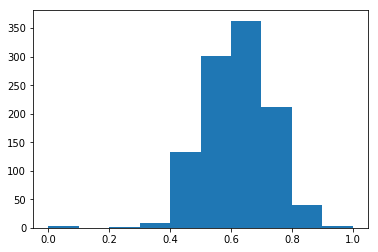

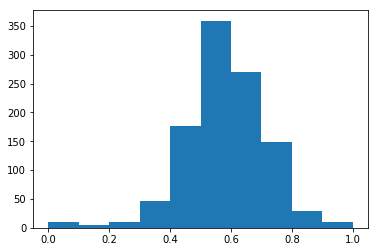

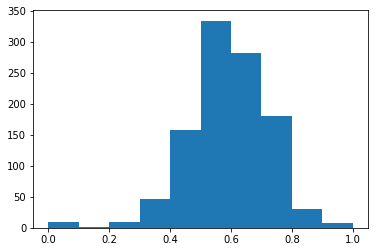

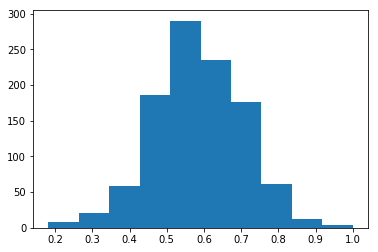

In [41]:
plt.hist([a[1] for a in acc])
plt.show()
plt.hist([a[1] for a in prec])
plt.show()
plt.hist([a[1] for a in recall])
plt.show()
plt.hist([a[1] for a in f1])
plt.show()

In [19]:
numEpochs = [results[item]['numEpochs'] for item in itemList]

In [20]:
print(np.mean(numEpochs),np.median(numEpochs))

35.901315789473685 21.0


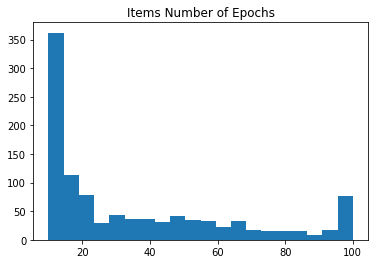

In [45]:
plt.hist(numEpochs,20,range=(10,100))
plt.title('Items Number of Epochs')
plt.show()

In [44]:
print(np.corrcoef(numEpochs,mae)[0][1])
print(np.corrcoef(numEpochs,profs)[0][1])

-0.33475814214305993
0.08011192030813026


In [53]:
lowMaeProf = [results[item]['model'] for item in itemList if results[item]['endMAE']<=np.median(mae)]
lowMae = [results[item]['endMAE'] for item in itemList if results[item]['endMAE']<=np.median(mae)]

In [54]:
print(np.corrcoef(lowMae,lowMaeProf)[0][1])

0.16581358672876145
